In [1]:
from htm_rl.agents.cc.cortical_column import GeneralFeedbackTM

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
config = dict(columns=3, 
                 cells_per_column=3,
                 context_cells=3,
                 feedback_cells=3,
                 activation_threshold_basal=1,
                 learning_threshold_basal=1,
                 activation_threshold_apical=1,
                 learning_threshold_apical=1,
                 connected_threshold_basal=0.5,
                 permanence_increment_basal=0.1,
                 permanence_decrement_basal=0.01,
                 initial_permanence_basal=0.4,
                 predicted_segment_decrement_basal=0.001,
                 sample_size_basal=-1,
                 max_synapses_per_segment_basal=-1,
                 max_segments_per_cell_basal=255,
                 connected_threshold_apical=0.5,
                 permanence_increment_apical=0.1,
                 permanence_decrement_apical=0.01,
                 initial_permanence_apical=0.4,
                 predicted_segment_decrement_apical=0.001,
                 sample_size_apical=-1,
                 max_synapses_per_segment_apical=-1,
                 max_segments_per_cell_apical=255,
                 prune_zero_synapses=True,
                 timeseries=False,
                 anomaly_window=1000,
                 confidence_window=1000,
                 noise_tolerance=0.0,
                 sm_ac=0.99,
                 seed=None)

In [4]:
def visualize(tm: GeneralFeedbackTM, step: int):
    fig, ax = plt.subplots(nrows=3, ncols=2)

    sns.heatmap(tm.active_cells_feedback.dense[tm.feedback_range[0]:tm.feedback_range[1]][None], 
                ax=ax[0, 1], linewidths=.5, cbar=False, xticklabels=False, yticklabels=False, vmin=0, vmax=1.5)
    sns.heatmap(tm.active_cells_context.dense[tm.context_range[0]:tm.context_range[1]][None], 
                ax=ax[1, 0], linewidths=.5, cbar=False, xticklabels=False, yticklabels=False, vmin=0, vmax=1.5)
    sns.heatmap((tm.active_cells.dense[tm.local_range[0]:tm.local_range[1]].reshape((-1, tm.columns)).T + 
                 tm.predicted_cells.dense[tm.local_range[0]:tm.local_range[1]].reshape((-1, tm.columns)).T*0.5),
               ax=ax[1, 1], linewidths=.5, cbar=False, xticklabels=False, yticklabels=False, vmin=0, vmax=1.5)
    sns.heatmap(tm.active_columns.dense[None],
               ax=ax[2, 1], linewidths=.5, cbar=False, xticklabels=False, yticklabels=False, vmin=0, vmax=1.5)

    ax[0, 1].set_title('Feedback')
    ax[1, 0].set_title('Context')
    ax[1, 1].set_title('')
    ax[2, 1].set_title('Input')

    ax[0, 0].axis('off')
    ax[0, 0].text(x=0.5, y=0.5, s=str(tm.anomaly[-1]))
    ax[0, 0].set_title('anomaly')
    ax[2, 0].axis('off')
    ax[2, 0].text(x=0.5, y=0.5, s=str(tm.confidence[-1]))
    ax[2, 0].set_title('confidence')
    fig.tight_layout(pad=1.0)
    fig.suptitle(f'step: {step}')

In [5]:
data = {
    'policy1': {'code': [0], 'actions': [([0], [0]), ([1], [1]), ([2], [2])]},
    'policy2': {'code': [1], 'actions': [([0], [1]), ([1], [1]), ([2], [0])]},
    'policy3': {'code': [2], 'actions': [([0], [2]), ([1], [2]), ([2], [1])]}
}

In [6]:
tm = GeneralFeedbackTM(**config)

In [7]:
step = 0

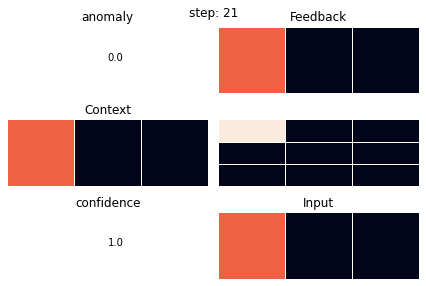

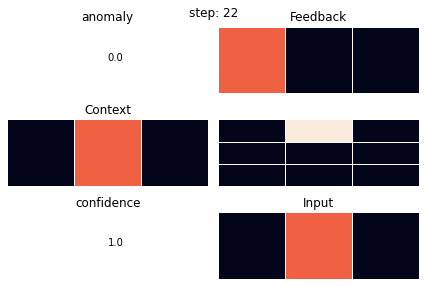

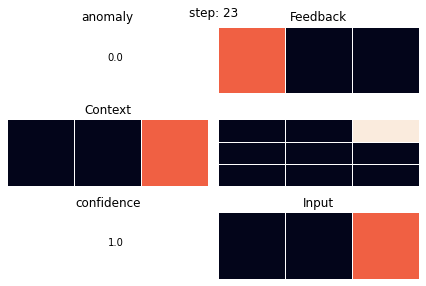

In [16]:
policy = 'policy1'

tm.set_active_feedback_cells(data[policy]['code'])

for state, action in data[policy]['actions']:
    tm.set_active_context_cells(state)
    
    tm.activate_apical_dendrites(True)
    tm.activate_basal_dendrites(True)
    tm.predict_cells()
    
    tm.set_active_columns(action)
    tm.activate_cells(True)
    
    visualize(tm, step)
    
    step += 1